In [1]:
import json
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
from helpers import plotOwners, plotNewOwners, remove0s

In [2]:
client = MongoClient('localhost', 27017)
db = client.steamspy

In [3]:
#creating new columns to be used for data and casting things as ints
data = pd.DataFrame(list(db.clean.find()))
data.drop(columns = "_id", inplace = True) #drop _id column
#making price column ints and making price of free games 0
data['price'] = data['price'].fillna(0)
data['price'] = data['price'].astype(int)
data['negative'] = data['negative'].astype(int)
data['positive'] = data['positive'].astype(int)
data['Like/Dislike Ratio'] = data['positive']/data['negative']

In [4]:
data = data[data['Genres'].apply(lambda x: 'Indie' not in x)]
data = data[data.price == 0]

In [5]:
action = data[data['Genres'].apply(lambda x: 'Action' in x)]
strategy = data[data['Genres'].apply(lambda x: 'Strategy' in x)]
rpg = data[data['Genres'].apply(lambda x: 'RPG' in x)]
adventure = data[data['Genres'].apply(lambda x: 'Adventure' in x)]
sports = data[data['Genres'].apply(lambda x: 'Sports' in x)]
simulation = data[data['Genres'].apply(lambda x: 'Simulation' in x)]
mmo = data[data['Genres'].apply(lambda x: 'MMO' in x)]

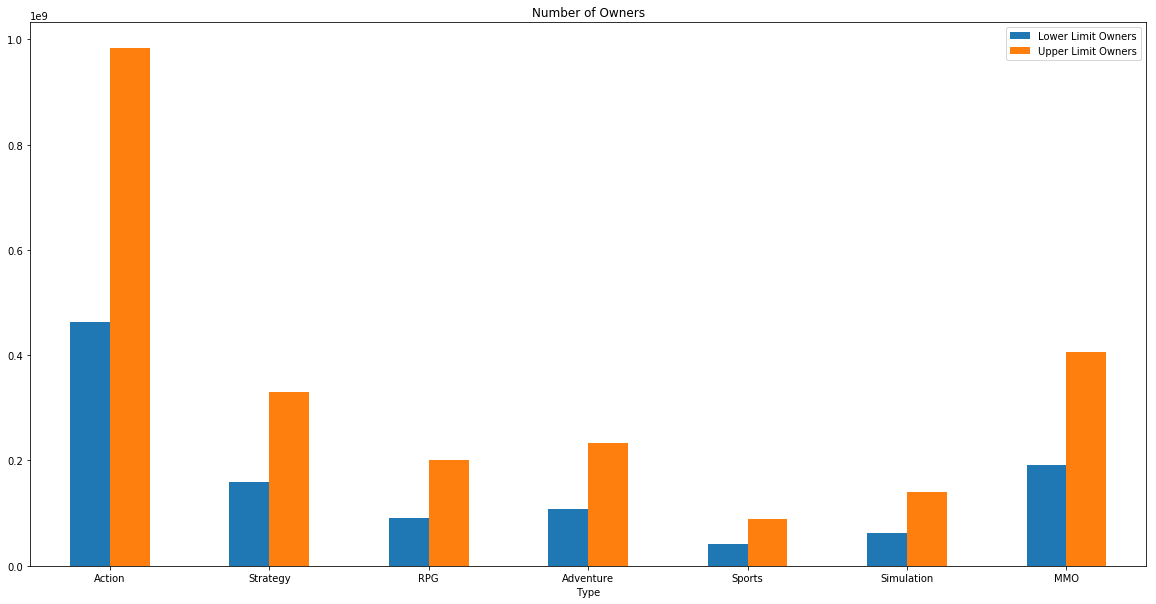

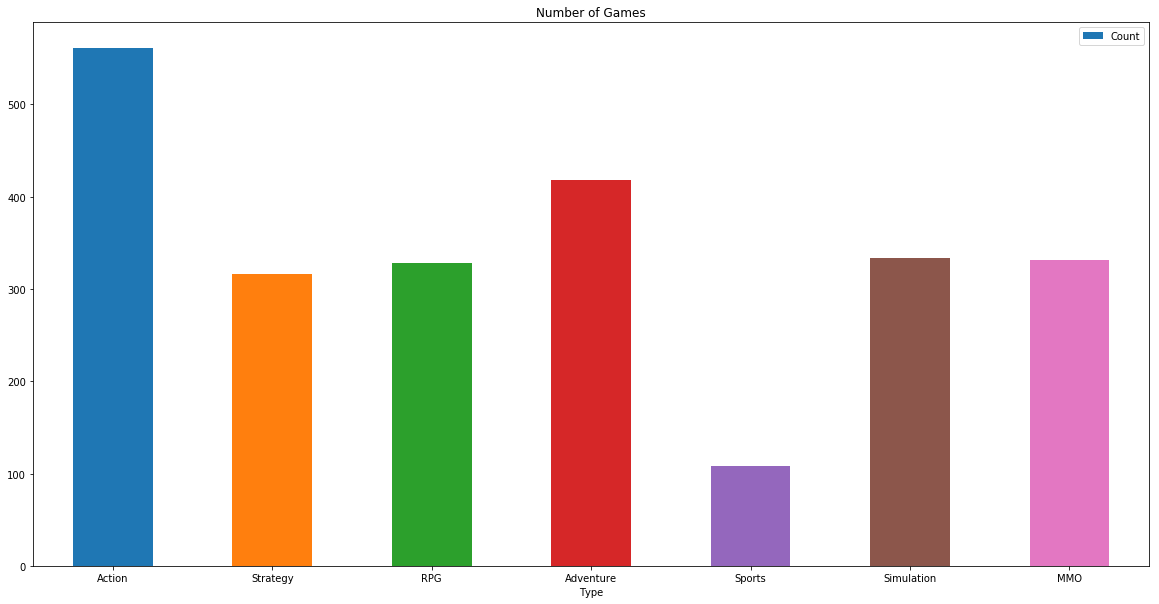

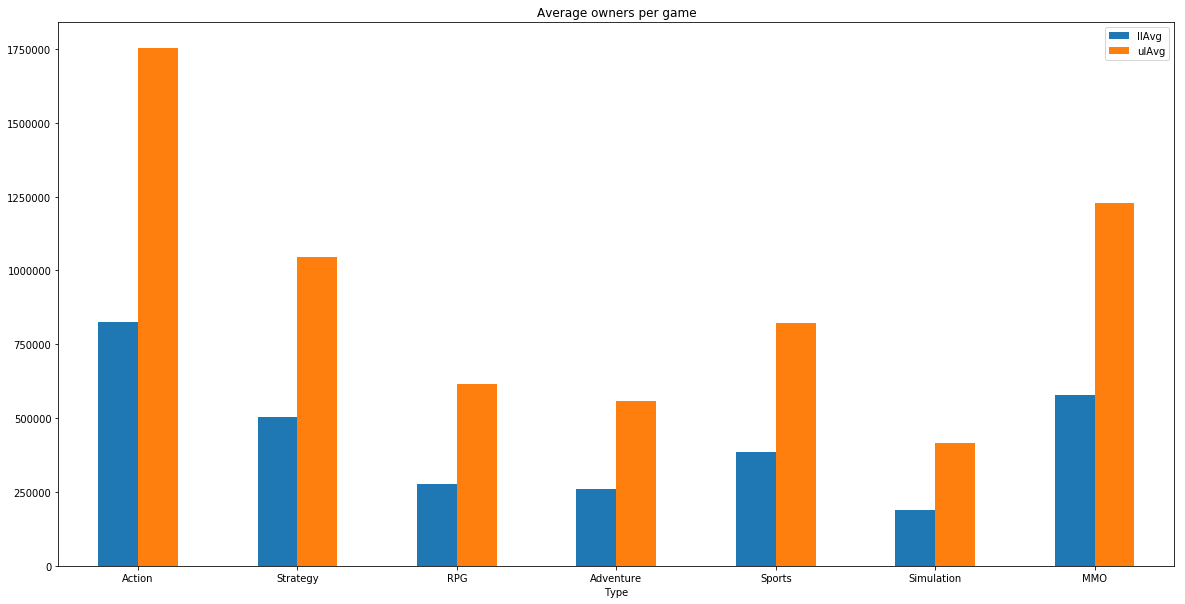

In [6]:
theGenres = [action, strategy, rpg, adventure, sports, simulation, mmo]
genreNames = ['Action', 'Strategy', 'RPG', 'Adventure', 'Sports',
              'Simulation', 'MMO']
plotOwners(theGenres, genreNames)

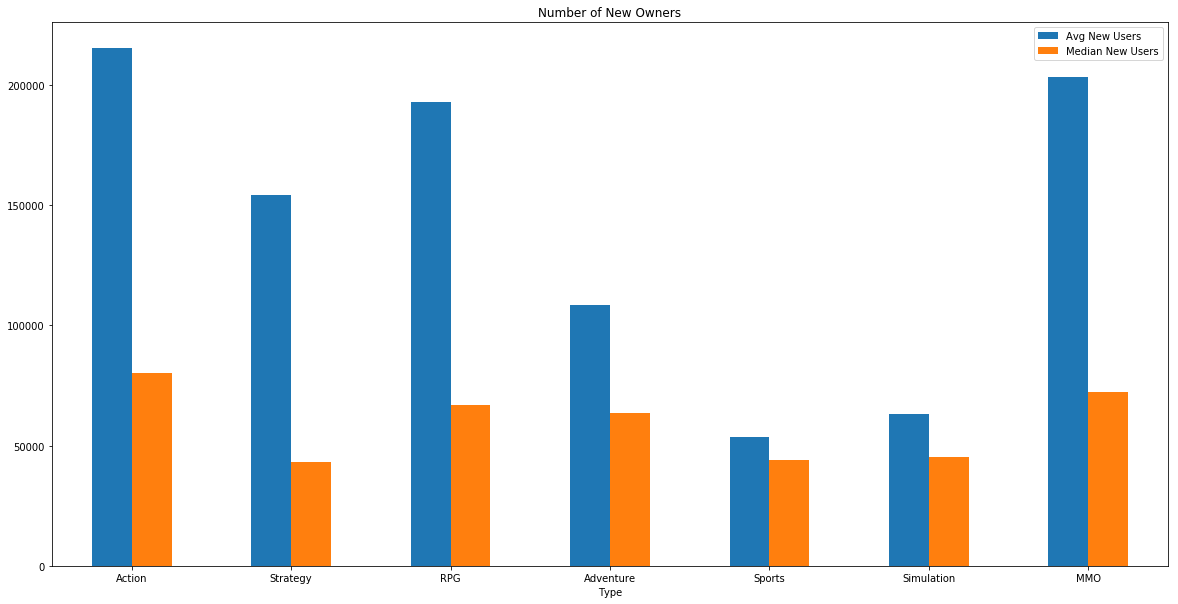

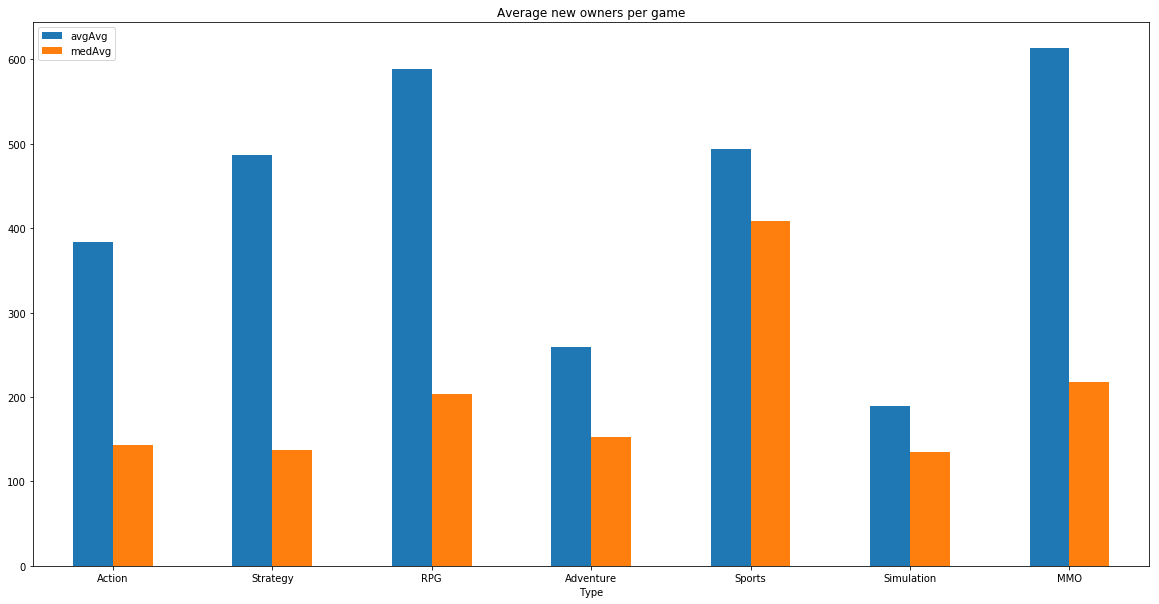

In [7]:
plotNewOwners(theGenres, genreNames)

Text(0, 0.5, 'Like/Dislike Ratio')

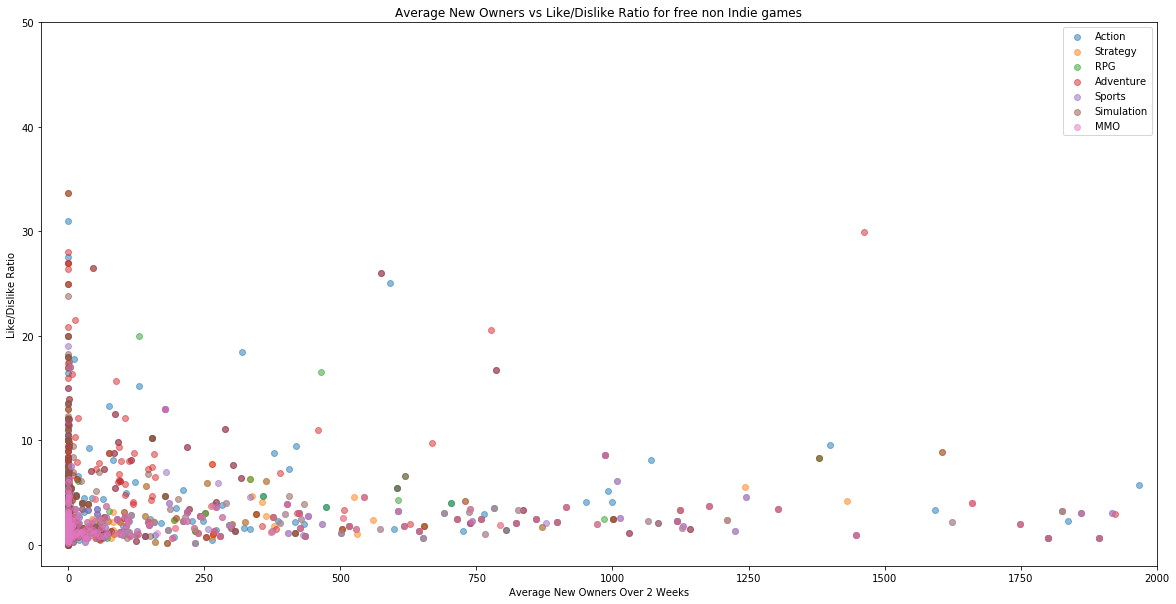

In [14]:
#average new owners vs like/dislike for free
fig, ax = plt.subplots(figsize=(20,10))
for genre in theGenres:
    ax.scatter(genre['average_forever'], genre['Like/Dislike Ratio'], alpha=0.5)
plt.xlim(-50, 2000)
plt.ylim(-2, 50)
leg = ax.legend(genreNames)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Like/Dislike Ratio for free non Indie games")
ax.set_xlabel("Average New Owners Over 2 Weeks")
ax.set_ylabel("Like/Dislike Ratio")

Text(0, 0.5, 'Like/Dislike Ratio')

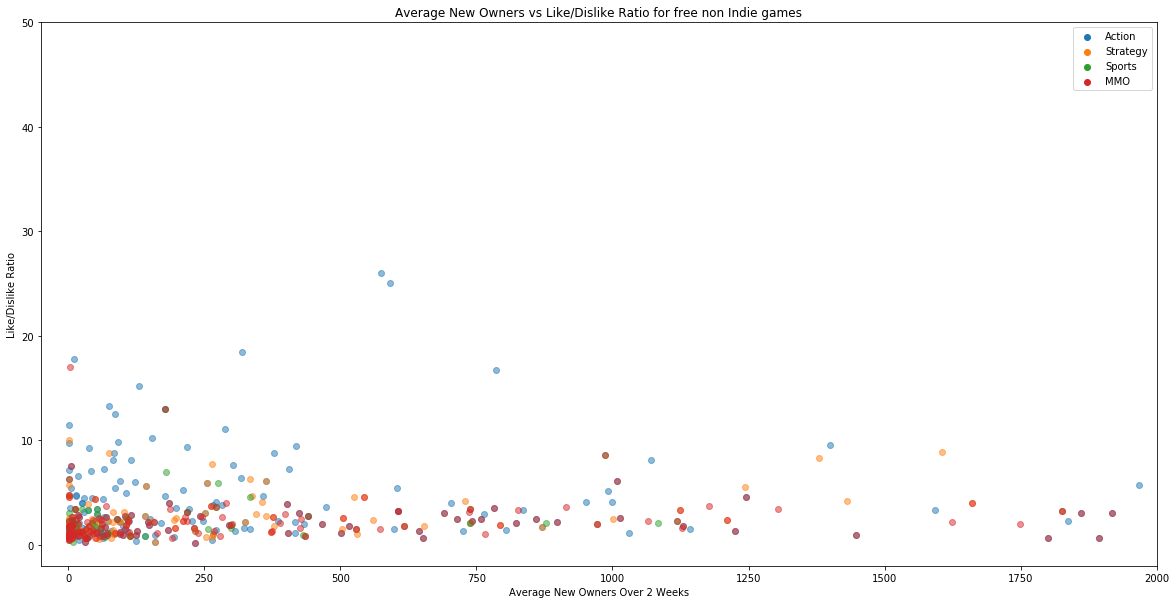

In [10]:
#average new owners vs like/dislike for free for top 4 genres
theGenres = [action, strategy, sports, mmo]
theGenres0 = []
for genre in theGenres:
    theGenres0.append(remove0s(genre))
genreNames = ['Action', 'Strategy', 'Sports', 'MMO']
fig, ax = plt.subplots(figsize=(20,10))
for genre in theGenres0:
    ax.scatter(genre['average_forever'], genre['Like/Dislike Ratio'], alpha=0.5)
plt.xlim(-50, 2000)
plt.ylim(-2, 50)
leg = ax.legend(genreNames)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Like/Dislike Ratio for free non Indie games")
ax.set_xlabel("Average New Owners Over 2 Weeks")
ax.set_ylabel("Like/Dislike Ratio")

Text(0, 0.5, 'Like/Dislike Ratio')

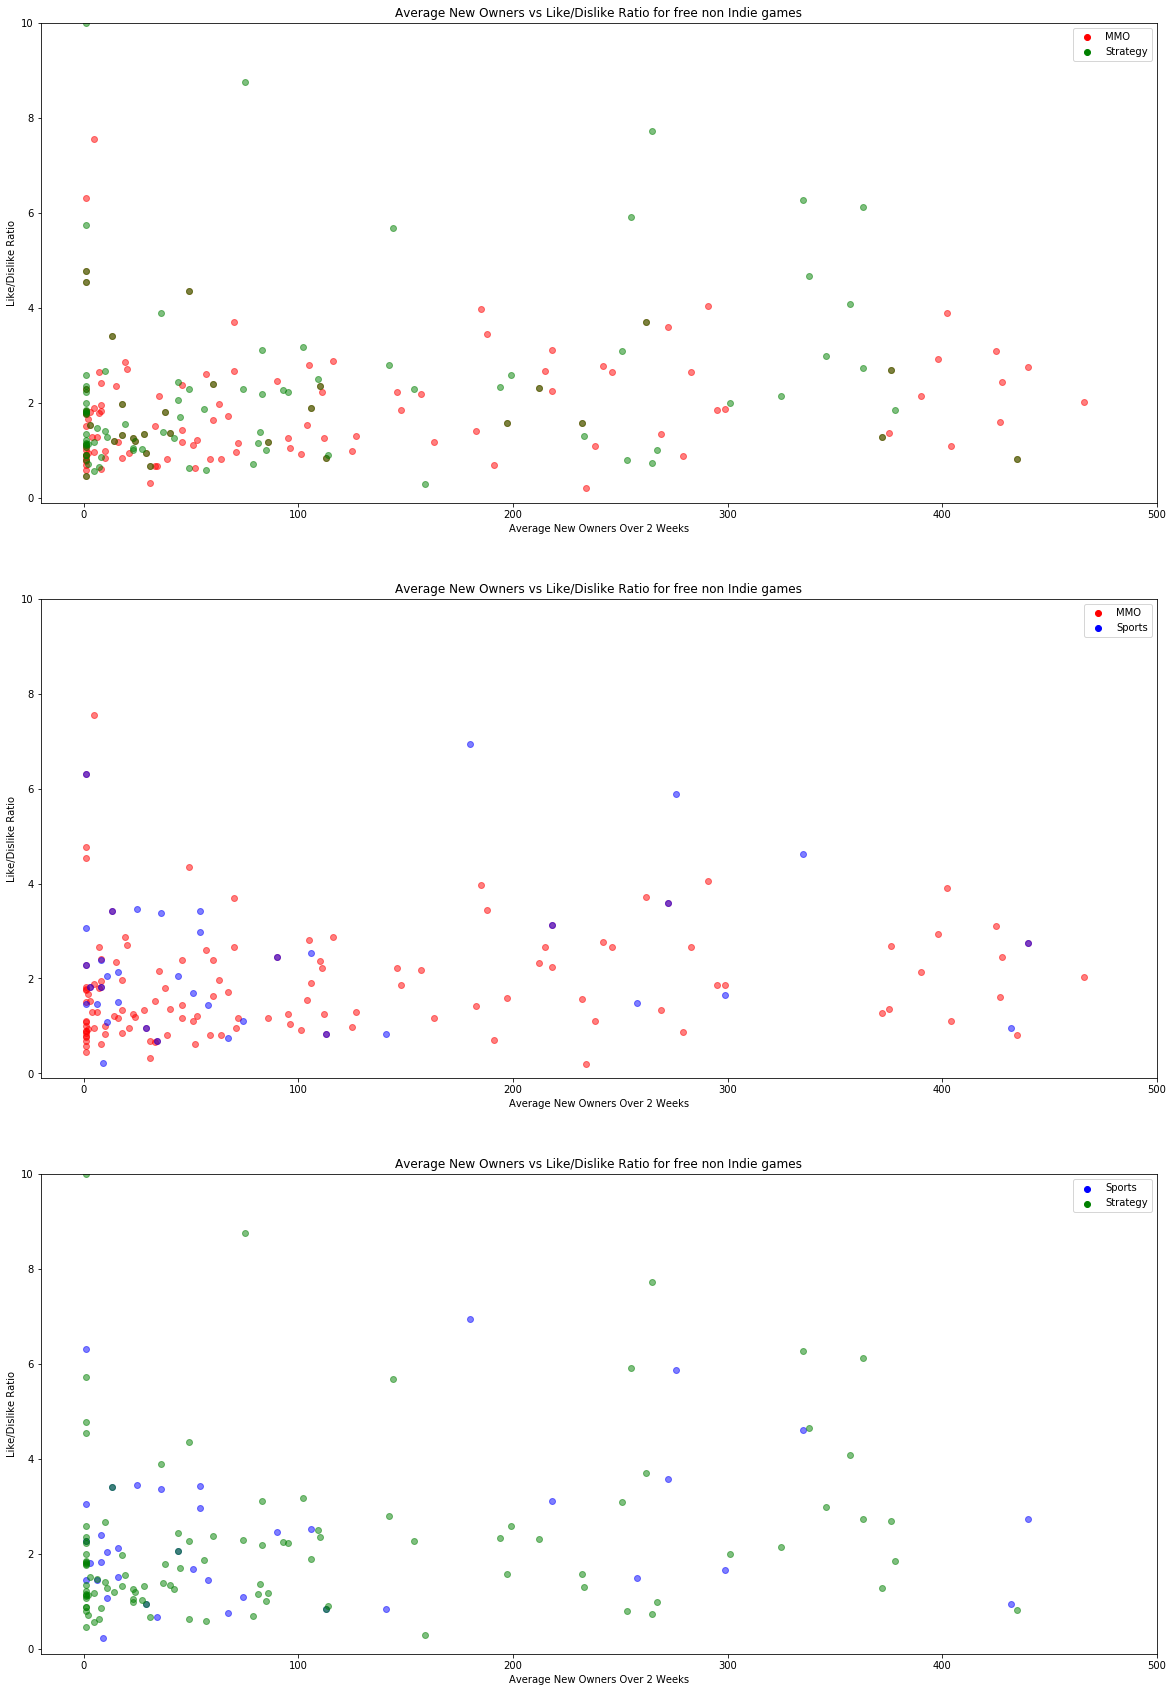

In [12]:
#median new owners vs like/dislike for free top 3 genres
mmo = remove0s(mmo)
strategy = remove0s(strategy)
sports = remove0s(sports)

fig, ax = plt.subplots(3,1, figsize=(20,30))
ax[0].scatter(mmo['average_forever'], mmo['Like/Dislike Ratio'], c = 'red', alpha=0.5)
ax[0].scatter(strategy['average_forever'], strategy['Like/Dislike Ratio'], c = 'green', alpha=0.5)
ax[0].set_xlim(-20, 500)
ax[0].set_ylim(-0.1, 10)
leg = ax[0].legend(['MMO', 'Strategy'])
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax[0].set_title("Average New Owners vs Like/Dislike Ratio for free non Indie games")
ax[0].set_xlabel("Average New Owners Over 2 Weeks")
ax[0].set_ylabel("Like/Dislike Ratio")

ax[1].scatter(mmo['average_forever'], mmo['Like/Dislike Ratio'], c = 'red', alpha=0.5)
ax[1].scatter(sports['average_forever'], sports['Like/Dislike Ratio'], c = 'blue', alpha=0.5)
ax[1].set_xlim(-20, 500)
ax[1].set_ylim(-.1, 10)
leg = ax[1].legend(['MMO', 'Sports'])
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax[1].set_title("Average New Owners vs Like/Dislike Ratio for free non Indie games")
ax[1].set_xlabel("Average New Owners Over 2 Weeks")
ax[1].set_ylabel("Like/Dislike Ratio")

ax[2].scatter(sports['average_forever'], sports['Like/Dislike Ratio'], c = 'blue', alpha=0.5)
ax[2].scatter(strategy['average_forever'], strategy['Like/Dislike Ratio'], c = 'green', alpha=0.5)
ax[2].set_xlim(-20, 500)
ax[2].set_ylim(-0.1, 10)
leg = ax[2].legend(['Sports', 'Strategy'])
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax[2].set_title("Average New Owners vs Like/Dislike Ratio for free non Indie games")
ax[2].set_xlabel("Average New Owners Over 2 Weeks")
ax[2].set_ylabel("Like/Dislike Ratio")

In [13]:
casual = data[data['Tags'].apply(lambda x: 'Casual' in x)]
soundtrack = data[data['Tags'].apply(lambda x: 'Great+Soundtrack' in x)]
atmospheric = data[data['Tags'].apply(lambda x: 'Atmospheric' in x)]
twoD = data[data['Tags'].apply(lambda x: '2D' in x)]
puzzle = data[data['Tags'].apply(lambda x: 'Puzzle' in x)]
openWorld = data[data['Tags'].apply(lambda x: 'Open+World' in x)]
storyRich = data[data['Tags'].apply(lambda x: 'Story+Rich' in x)]
coop = data[data['Tags'].apply(lambda x: 'Co-op' in x)]
difficult = data[data['Tags'].apply(lambda x: 'Difficult' in x)]
shooter = data[data['Tags'].apply(lambda x: 'Shooter' in x)]
scifi = data[data['Tags'].apply(lambda x: 'Sci-fi' in x)]
firstPerson = data[data['Tags'].apply(lambda x: 'First-Person' in x)]
horror = data[data['Tags'].apply(lambda x: 'Horror' in x)]
vr = data[data['Tags'].apply(lambda x: 'VR' in x)]
anime = data[data['Tags'].apply(lambda x: 'Anime' in x)]
pixelGraphics = data[data['Tags'].apply(lambda x: 'Pixel+Graphics' in x)]
funny = data[data['Tags'].apply(lambda x: 'Funny' in x)]
fantasy = data[data['Tags'].apply(lambda x: 'Fantasy' in x)]
platformer = data[data['Tags'].apply(lambda x: 'Platformer' in x)]
femaleProtagonist = data[data['Tags'].apply(lambda x: 'Female+Protagonist' in x)]
fps = data[data['Tags'].apply(lambda x: 'FPS' in x)]
survival = data[data['Tags'].apply(lambda x: 'Survival' in x)]
gore = data[data['Tags'].apply(lambda x: 'Gore' in x)]
violent = data[data['Tags'].apply(lambda x: 'Violent' in x)]
sandbox = data[data['Tags'].apply(lambda x: 'Sandbox' in x)]
comedy = data[data['Tags'].apply(lambda x: 'Comedy' in x)]
arcade = data[data['Tags'].apply(lambda x: 'Arcade' in x)]
classic = data[data['Tags'].apply(lambda x: 'Classic' in x)]
nudity = data[data['Tags'].apply(lambda x: 'Nudity' in x)]
onlineCoop = data[data['Tags'].apply(lambda x: 'Online+Co-op' in x)]
tactical = data[data['Tags'].apply(lambda x: 'Tactical' in x)]
zombies = data[data['Tags'].apply(lambda x: 'Zombies' in x)]
teamBased = data[data['Tags'].apply(lambda x: 'Team-Based' in x)]
pve = data[data['Tags'].apply(lambda x: 'PvE' in x)]
pvp = data[data['Tags'].apply(lambda x: 'PvP' in x)]
war = data[data['Tags'].apply(lambda x: 'War' in x)]
controller = data[data['Tags'].apply(lambda x: 'Controller' in x)]

In [14]:
tags = [casual, soundtrack, atmospheric, twoD, puzzle, openWorld, storyRich, coop, difficult, shooter, scifi,
       firstPerson, horror, vr, anime, pixelGraphics, funny, fantasy, platformer, femaleProtagonist, fps, 
       survival, gore, violent, sandbox, comedy, arcade, classic, nudity, onlineCoop, tactical, zombies, teamBased,
       pve, pvp, war, controller]
tagNames = ['Casual', 'Great Soundtrack', 'Atmospheric', '2D', 'Puzzle', 'Open World', 'Story Rich', 'Co-op',
           'Difficult', 'Shooter', 'Sci-fi', 'First-Person', 'Horror', 'VR', 'Anime', 'Pixel Graphics', 'Funny',
           'Fantasy', 'Platformer', 'Female Protagonist', 'FPS', 'Survival', 'Gore', 'Violent', 'Sandbox', 'Comedy',
           'Arcade', 'Classic', 'Nudity', 'Online Co-op', 'Tactical', 'Zombies', 'Team-Based', 'PvE', 'PvP', 'War',
           'Controller']

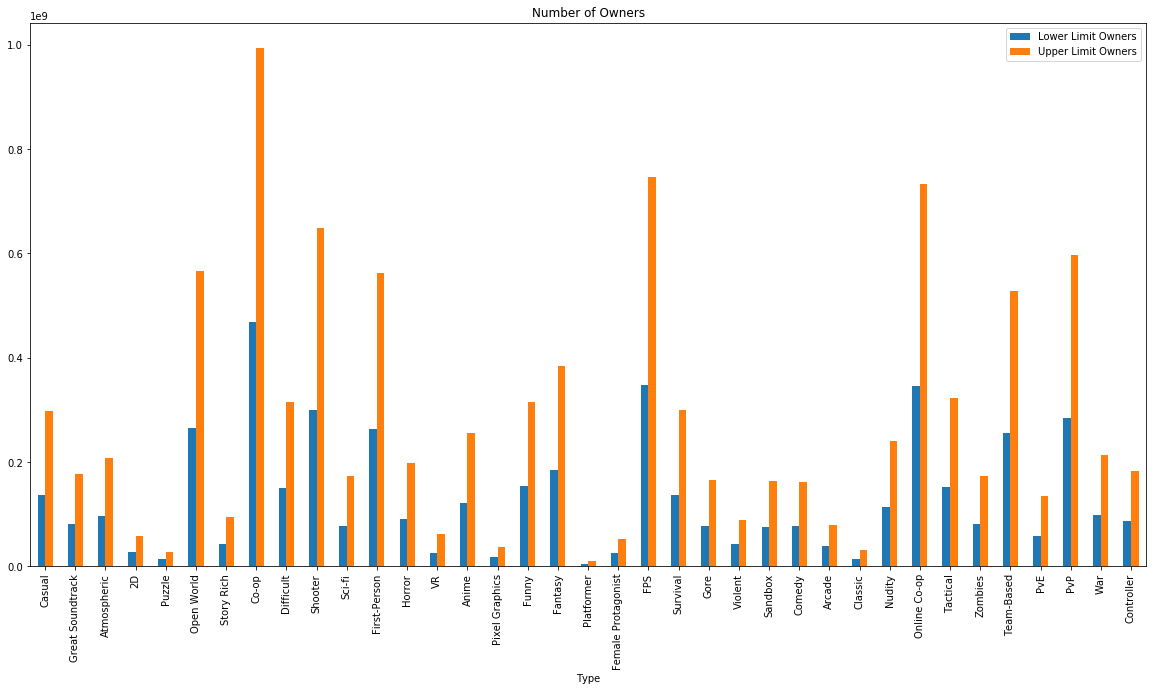

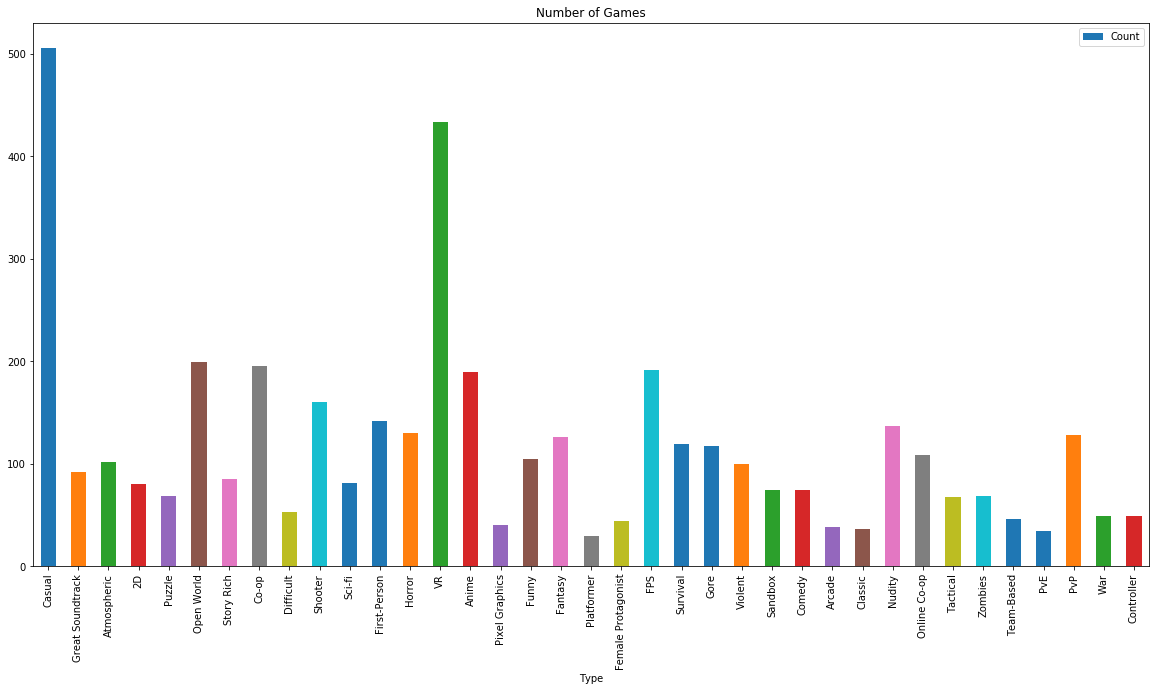

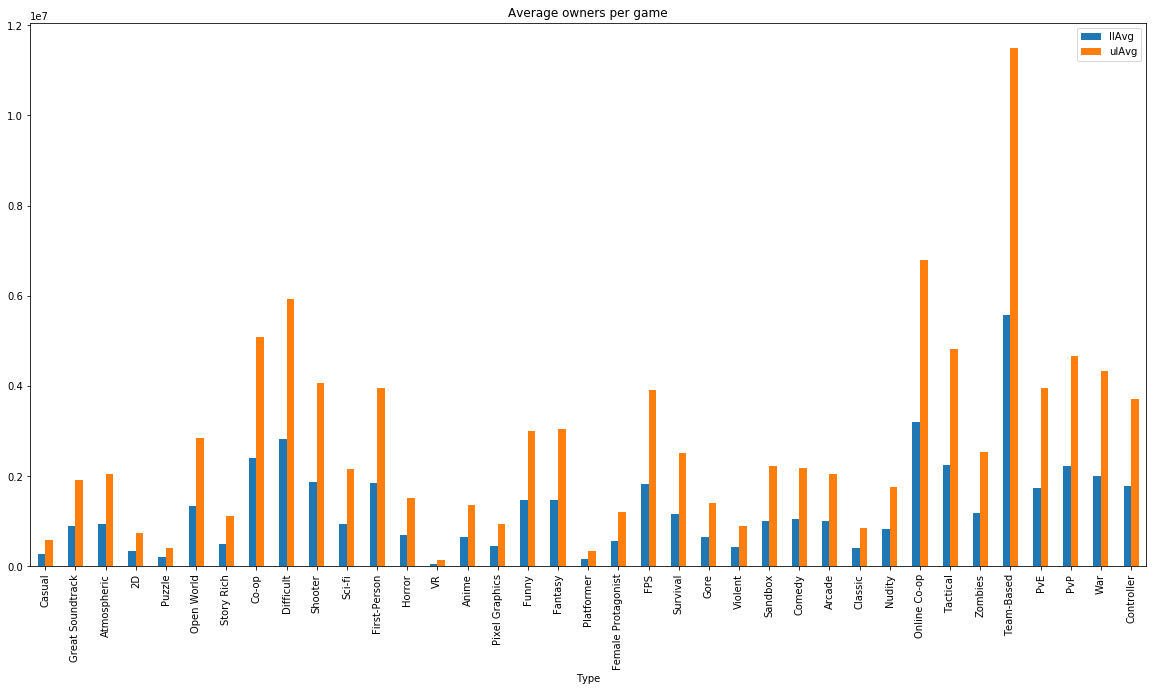

In [15]:
#owners of tags
plotOwners(tags, tagNames, 90)

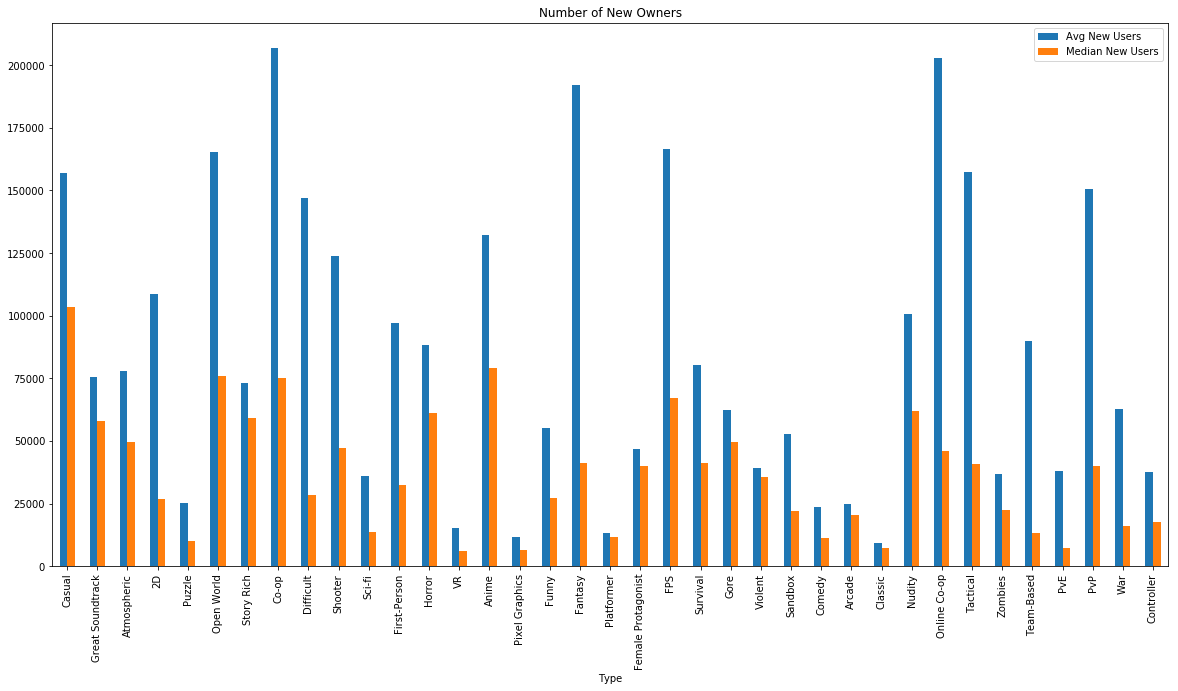

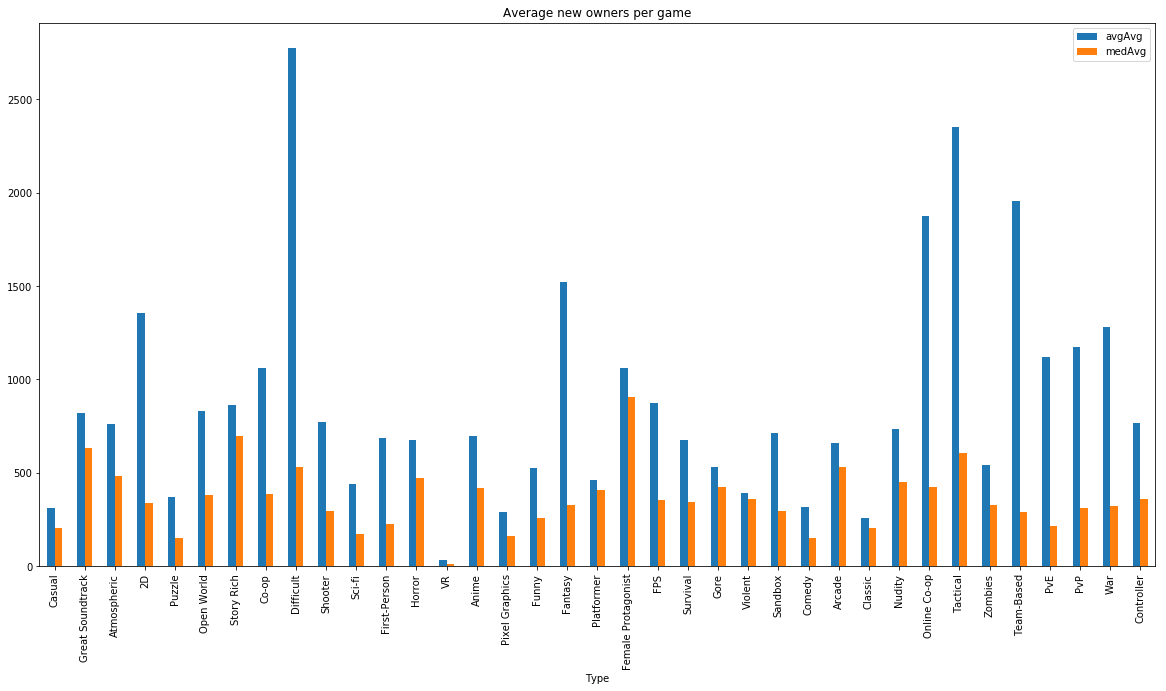

In [16]:
plotNewOwners(tags, tagNames, 90)

Text(0, 0.5, 'Like/Dislike Ratio')

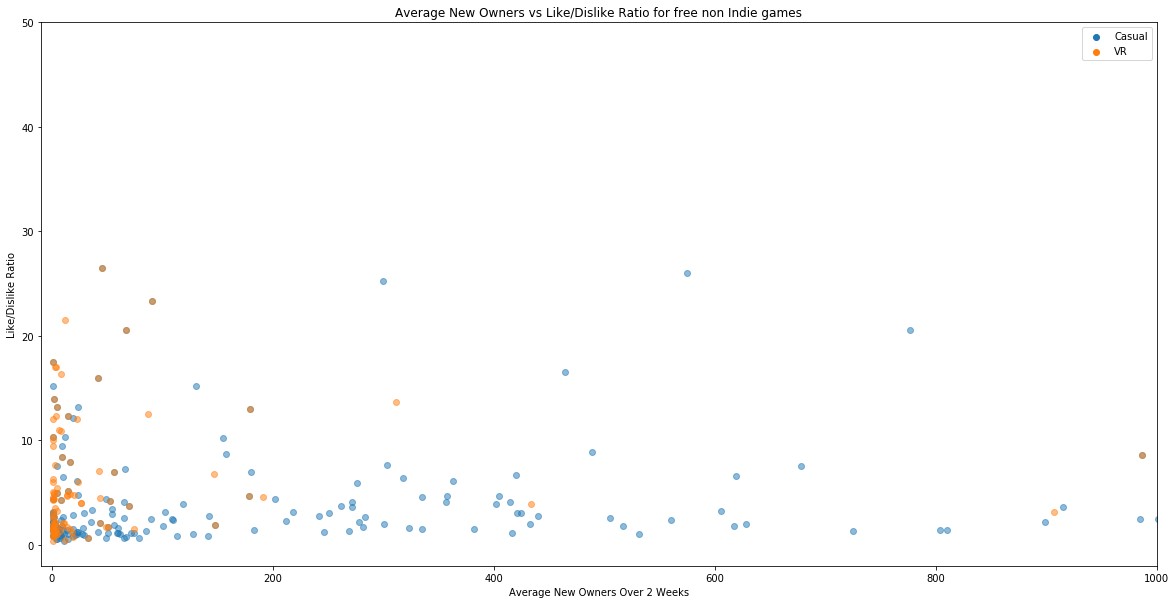

In [17]:
tags = [casual, vr]
tags0 = []
for tag in tags:
    tags0.append(remove0s(tag))
tagNames = ['Casual', 'VR']
fig, ax = plt.subplots(figsize=(20,10))
for tag in tags0:
    ax.scatter(tag['average_forever'], tag['Like/Dislike Ratio'], alpha=0.5)
plt.xlim(-10, 1000)
plt.ylim(-2, 50)
leg = ax.legend(tagNames)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title("Average New Owners vs Like/Dislike Ratio for free non Indie games")
ax.set_xlabel("Average New Owners Over 2 Weeks")
ax.set_ylabel("Like/Dislike Ratio")

Text(0, 0.5, 'Like/Dislike Ratio')

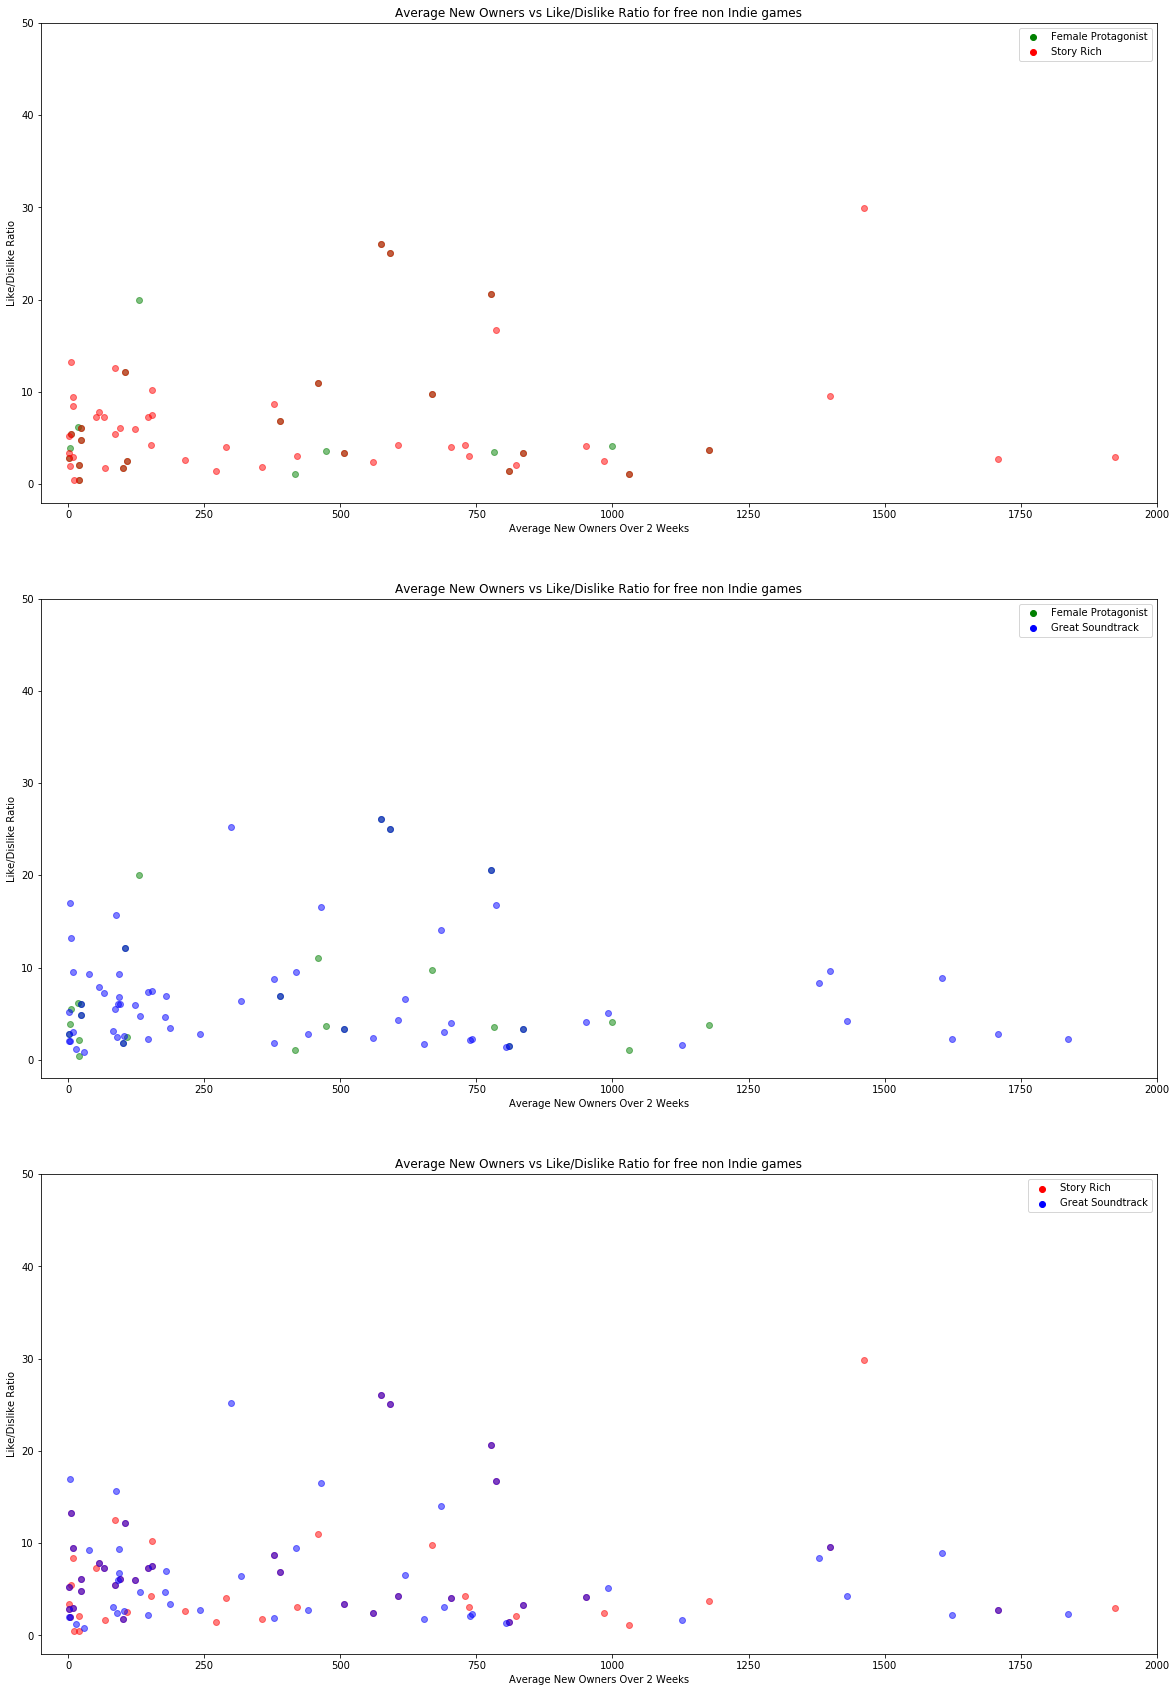

In [20]:
femaleProtagonist = remove0s(femaleProtagonist)
storyRich = remove0s(storyRich)
soundtrack = remove0s(soundtrack)

fig, ax = plt.subplots(3, 1, figsize=(20,30))

ax[0].scatter(femaleProtagonist['average_forever'], femaleProtagonist['Like/Dislike Ratio'], c= 'green', alpha=0.5)
ax[0].scatter(storyRich['average_forever'], storyRich['Like/Dislike Ratio'], c='red', alpha=0.5)
ax[0].set_xlim(-50, 2000)
ax[0].set_ylim(-2, 50)
leg = ax[0].legend(['Female Protagonist', 'Story Rich'])
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax[0].set_title("Average New Owners vs Like/Dislike Ratio for free non Indie games")
ax[0].set_xlabel("Average New Owners Over 2 Weeks")
ax[0].set_ylabel("Like/Dislike Ratio")

ax[1].scatter(femaleProtagonist['average_forever'], femaleProtagonist['Like/Dislike Ratio'], c= 'green', alpha=0.5)
ax[1].scatter(soundtrack['average_forever'], soundtrack['Like/Dislike Ratio'], c='blue', alpha=0.5)
ax[1].set_xlim(-50, 2000)
ax[1].set_ylim(-2, 50)
leg = ax[1].legend(['Female Protagonist','Great Soundtrack'])
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax[1].set_title("Average New Owners vs Like/Dislike Ratio for free non Indie games")
ax[1].set_xlabel("Average New Owners Over 2 Weeks")
ax[1].set_ylabel("Like/Dislike Ratio")

ax[2].scatter(storyRich['average_forever'], storyRich['Like/Dislike Ratio'], c= 'red', alpha=0.5)
ax[2].scatter(soundtrack['average_forever'], soundtrack['Like/Dislike Ratio'], c='blue', alpha=0.5)
ax[2].set_xlim(-50, 2000)
ax[2].set_ylim(-2, 50)
leg = ax[2].legend(['Story Rich', 'Great Soundtrack'])
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax[2].set_title("Average New Owners vs Like/Dislike Ratio for free non Indie games")
ax[2].set_xlabel("Average New Owners Over 2 Weeks")
ax[2].set_ylabel("Like/Dislike Ratio")